# Install & Import Libraries

In [3]:
# ✅ Install required libraries (for Colab)
!pip install gradio pandas scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import gradio as gr


# Load Dataset

In [4]:
# ✅ Upload file in Colab
from google.colab import files
uploaded = files.upload()  # Choose city_day.csv or station_day.csv

# ✅ Load Dataset
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

print("Dataset Loaded ✅")
print("Shape:", df.shape)
df.head()


Saving city_day.csv to city_day (2).csv
Dataset Loaded ✅
Shape: (29531, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# Preprocess Data

In [5]:
# ✅ Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# ✅ Select relevant columns (works for city_day.csv & station_day.csv)
selected_columns = ["PM2.5", "PM10", "NO2", "SO2", "CO", "AQI"]
df = df[selected_columns].dropna()

print(f"After Cleaning: {df.shape[0]} rows left")
df.head()


Missing values per column:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64
After Cleaning: 16291 rows left


,PM2.5,PM10,NO2,SO2,CO,AQI
1595,37.55,122.41,85.12,163.01,15.08,281.0
1596,33.97,116.32,79.71,91.26,14.67,330.0
1597,35.48,130.07,77.61,98.35,18.02,356.0
1598,34.11,138.31,75.23,88.66,13.27,359.0
1599,33.69,111.73,68.90,80.90,34.56,547.0


# Data Preprocessing & Train-Test Split

In [6]:
# ✅ Features and Target
X = df.drop(columns=["AQI"])
y = df["AQI"]

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 13032, Testing samples: 3259


# **Train Model & Evaluate**

In [7]:
# ✅ Train Random Forest
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# ✅ Predictions & Metrics
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 854.018876969759
R² Score: 0.9197552184960847


# **Visualization**

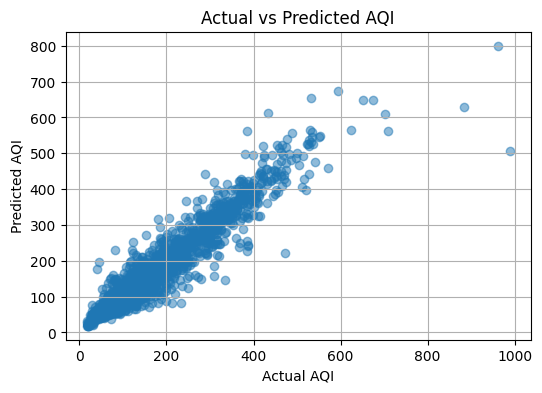

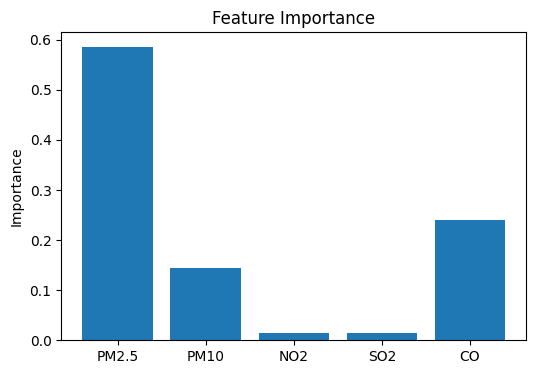

In [8]:
# ✅ Actual vs Predicted Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.grid()
plt.show()

# ✅ Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(6, 4))
plt.bar(X.columns, importances)
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.show()


**Gradio App**

In [9]:
# ✅ Function to Predict AQI
def predict_aqi(pm25, pm10, no2, so2, co):
    input_data = np.array([[pm25, pm10, no2, so2, co]])
    prediction = model.predict(input_data)[0]

    if prediction <= 50:
        category = "Good ✅"
    elif prediction <= 100:
        category = "Moderate 🙂"
    elif prediction <= 200:
        category = "Unhealthy for Sensitive Groups 😷"
    elif prediction <= 300:
        category = "Unhealthy 🚫"
    elif prediction <= 400:
        category = "Very Unhealthy ☠️"
    else:
        category = "Hazardous ☢️"

    return f"Predicted AQI: {prediction:.2f}\nCategory: {category}"

# ✅ Launch Gradio UI
interface = gr.Interface(
    fn=predict_aqi,
    inputs=[
        gr.Number(label="PM2.5"),
        gr.Number(label="PM10"),
        gr.Number(label="NO2"),
        gr.Number(label="SO2"),
        gr.Number(label="CO"),
    ],
    outputs="text",
    title="🌱 AQI Predictor (Real Data)",
    description="Enter pollutant levels to predict AQI and see health category."
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://96df504cbfe0ba21f0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
